In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from linear_models import LinearBinaryClassifier
from itertools import product
%matplotlib inline

In [39]:
C1 = np.random.multivariate_normal([3,3], [[15,0],[0,15]], 500)
C2 = np.random.multivariate_normal([-3,-3], [[15,0],[0,15]], 500)

In [40]:
X = np.concatenate([C1, C2])
Y = np.ones(1000)
Y[:500] = -1.0 * Y[:500]

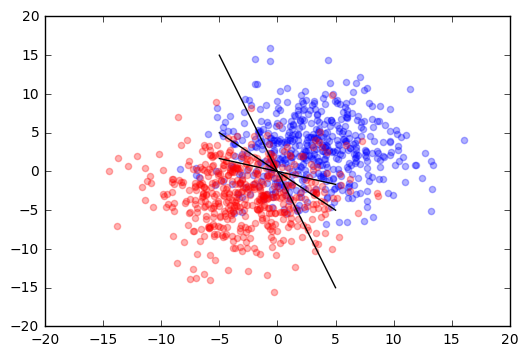

In [41]:
ws = [[1, 1], [3, 1], [1,3]]
x1s = []
x0s = np.copy(np.linspace(-5, 5, 100))
for w in ws:
    res = []
    for x0 in x0s:
        res.append(-1.0 * x0 * w[0] / w[1])
    x1s.append(res)

# loss = ax.plot_trisurf(grid[:,0], grid[:,1], values, color='red', alpha=.3)
plt.plot(x0s, x1s[0], color='black')
plt.plot(x0s, x1s[1], color='black')
plt.plot(x0s, x1s[2], color='black')

plt.scatter(C1[:,0], C1[:,1], alpha=0.3, color='blue')
plt.scatter(C2[:,0], C2[:,1], alpha=0.3, color='red')

In [49]:
print LinearBinaryClassifier(np.array([[-1.0], [-1.0]]), np.array([0.0])).evaluate(X, Y)
print LinearBinaryClassifier(np.array([[-1], [-2.0]]), np.array([0.0])).evaluate(X, Y)
print LinearBinaryClassifier(np.array([[-2], [-1.0]]), np.array([0.0])).evaluate(X, Y)

0.85
0.842
0.831


In [50]:
models = [LinearBinaryClassifier(np.array([[-1.0], [-1.0]]), np.array([0.0])),
          LinearBinaryClassifier(np.array([[-1], [-2.0]]), np.array([0.0])),
          LinearBinaryClassifier(np.array([[-2], [-1.0]]), np.array([0.0]))]

In [51]:
bounds = np.linspace(-10, 10, 50)
grid = np.array(list(product(bounds,bounds)))

In [52]:
loss_values = []
for i in xrange(grid.shape[0]):
    val = sum([.3333 * model.rhinge_loss(grid[i:i+1], np.array([-1])) for model in models])
    loss_values.append(val)

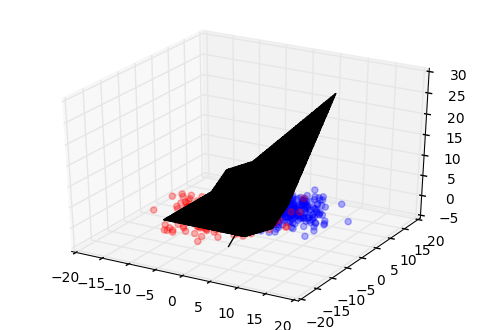

In [58]:
fig = plt.figure()
ax = fig.gca(projection='3d')
loss = ax.plot_trisurf(grid[:,0], grid[:,1], loss_values, color='blue')

ax.plot(x0s, x1s[0], color='black')
ax.plot(x0s, x1s[1], color='black')
ax.plot(x0s, x1s[2], color='black')

ax.scatter(C1[:,0], C1[:,1], alpha=0.3, color='blue')
ax.scatter(C2[:,0], C2[:,1], alpha=0.3, color='red')

In [ ]:
    w = [1, 1]
    x1s = []
    x0s = np.copy(np.linspace(-5, 5, 100))
    for x0 in x0s:
        x1s.append(-1.0 * x0 * w[0] / w[1])

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # loss = ax.plot_trisurf(grid[:,0], grid[:,1], values, color='red', alpha=.3)
    line1 = ax.plot(x0s, x1s,  [0.0] * len(x1s), color='blue')

In [ ]:
plt.scatter(grid[:,0], grid[:,1], alpha=.3)